# Explorartory Data Analysis Project - Retail Market Store

## Introduction

A supermarket is a self-service shop offering a wide variety of food, beverages and household products, organized into sections. This kind of store is larger and has a wider selection than earlier grocery stores, but is smaller and more limited in the range of merchandise than a hypermarket or big-box market. In everyday usage, however,* "grocery store"* is synonymous with supermarket, and is not used to refer to other types of stores that sell groceries.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/kMwMyk6/super.jpg" alt="super" border="0"></a><br /><a target='_blank' href='https://the-crosswordsolver.com/genuine-in-germany-4-letters'></a><br />

----
### IMPORTING LIBRARIES¶
List of all the python libraries that are required:

- Library `pandas` will be required to work with data in tabular representation.
- Library `numpy` will be required to round the data in the correlation matrix.
- Library `warning` will be required to ignore all warnings.
- Library `matplotlib`, `seaborn`, `plotly` required for data visualization.

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore")

In [2]:
df = pd.read_csv('F:/SPARKS_foundation/SampleSuperstore.csv')
print('Data loaded successfully.')

Data loaded successfully.



--------------
Now the dataset is loaded, we will now understand the dataset.

----

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [28]:
df.sample(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6682,First Class,Home Office,United States,Franklin,Wisconsin,53132,Central,Office Supplies,Binders,3.600,2,0.00,1.7280
6891,Standard Class,Corporate,United States,Columbus,Georgia,31907,South,Office Supplies,Art,113.940,3,0.00,34.1820
7550,Standard Class,Corporate,United States,New York City,New York,10024,East,Office Supplies,Envelopes,34.740,3,0.00,17.3700
7814,First Class,Home Office,United States,Los Angeles,California,90049,West,Furniture,Bookcases,1497.666,2,0.15,140.9568
3667,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Supplies,13.880,5,0.20,-2.6025


In [29]:
print('Shape of our dataframe is :',str(df.shape))

Shape of our dataframe is : (9977, 13)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

>The given Dataframe has no NaN (Missing) Values.        

----
### MATHEMATICAL VIEW OF THE DATA
---
____

#### 1.NUMERICAL COLUMNS


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### 2.CATEGORICAL COLUMNS

In [31]:
df.describe(include='object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


---
_____
#### CHECKING FOR ANY DUPLICATE VALUES
---
____

In [32]:
df.duplicated().sum()

0

>The dataframe have 17 dupplicates values,hence removing them beforehand using `drop_duplicates()`

In [10]:
df.drop_duplicates(inplace= True)

In [33]:
df.shape

(9977, 13)

>The Shape has been reduced to `(9977,13)`.                                                                               

____
#### Finding if there Correlations between various columns of the given data. 

---

In [37]:
df.corr().round(4)

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.0000,-0.0235,0.0131,0.0592,-0.0299
Sales,-0.0235,1.0000,0.2007,-0.0283,0.4791
Quantity,0.0131,0.2007,1.0000,0.0087,0.0662
Discount,0.0592,-0.0283,0.0087,1.0000,-0.2197
Profit,-0.0299,0.4791,0.0662,-0.2197,1.0000


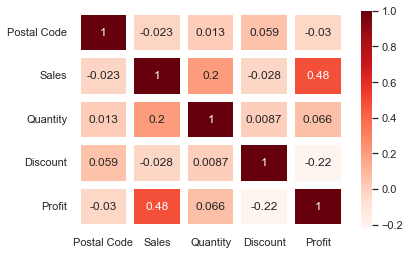

In [38]:
sns.heatmap(df.corr(), annot = True, cmap = 'Reds', lw = 8, linecolor = 'white');

----
#### **Analysis:**
>We can notice `sales` is fairly related to `profit` and `discount` is negatively related to `profit`.

**Higher sales and lesser discounts leads to more profit.**

It is also noticable that `postal code` has nothing to do with overall `profit`

---

## **Univariate Analysis**

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

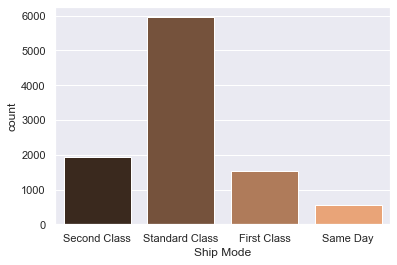

In [133]:
sns.countplot(x=df['Ship Mode'],
              palette = 'copper',
              orient='h')

<AxesSubplot:xlabel='Segment', ylabel='count'>

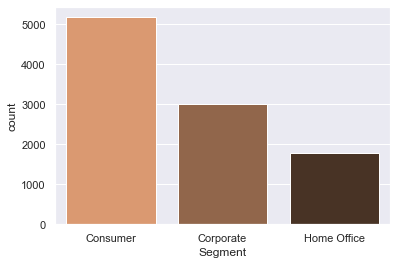

In [134]:
sns.countplot(x=df['Segment'],
              palette = 'copper_r',
              orient='h')

<AxesSubplot:ylabel='Region'>

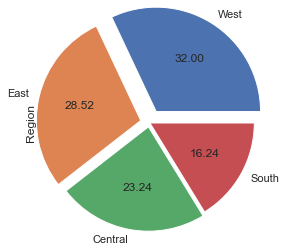

In [138]:
df['Region'].value_counts().plot(kind='pie',autopct="%.2f",radius=1.2,explode=[0.15,0.1,0.05,0.01])

<AxesSubplot:ylabel='Category'>

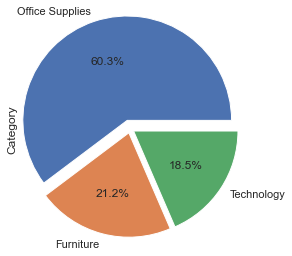

In [137]:
df['Category'].value_counts().plot(kind='pie',autopct="%.1f%%",radius=1.2,explode=[0.1,0.05,0.05])

<AxesSubplot:>

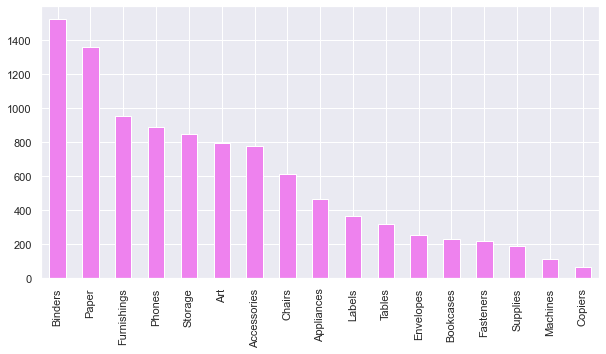

In [125]:
df['Sub-Category'].value_counts().plot(kind='bar',figsize=(10,5),color='violet')

<AxesSubplot:xlabel='Quantity', ylabel='count'>

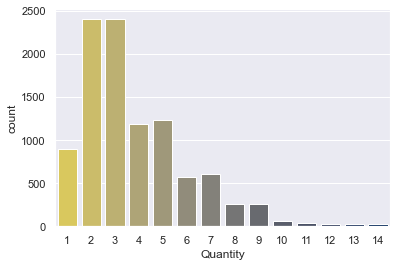

In [123]:
sns.countplot(x=df['Quantity'],
              palette = 'cividis_r',
              orient='h')

---
#### **CONCLUSIONS:**

* `Standard class` ship-mode is more preferred.
* `Consumer` is the major segment.
* More Stores are Located in the `West`.
* The Major Category of Goods sold are the `Office Supplies`.
* Most of the Goods that are purchased are `Binders`, `Paper`,`Furnishings`,`Phones`,`Storages`.

---

## **Bivariate Analysis**

We will be comparing other features to `profit`, `sales` and `quantities` to get a visual idea about what affects the profit most.

## 1. Ship-Mode

In [15]:
ship_df = pd.DataFrame(df.groupby(['Ship Mode'])[['Profit','Sales', 'Quantity']].sum())
ship_df

,Profit,Sales,Quantity
Ship Mode,,,
First Class,48953.6561,3.513805e+05,5690
Same Day,15871.8869,1.283217e+05,1956
Second Class,57446.6516,4.591770e+05,7418
Standard Class,163969.2280,1.357316e+06,22756


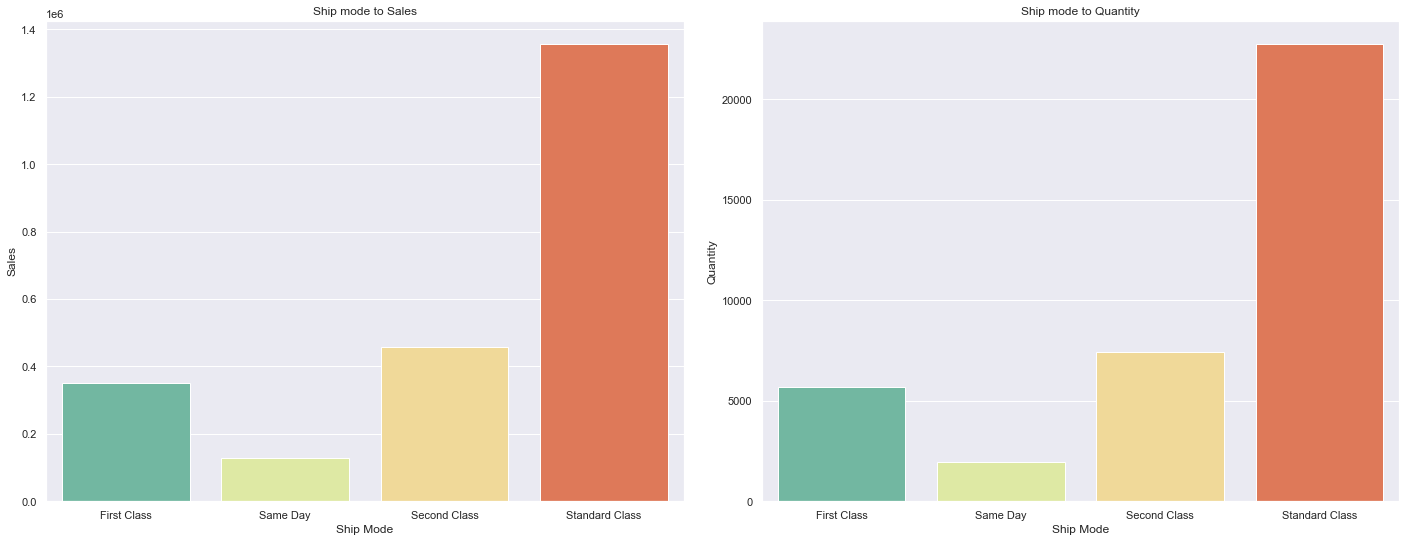

In [149]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.set_theme(style="darkgrid")
axes[0].set_title("Ship mode to Sales")
axes[1].set_title("Ship mode to Quantity")

sns.barplot(x=ship_df.index,
           y=ship_df['Sales'],
           data= ship_df,
            palette = 'Spectral_r',
           ax = axes[0]);

sns.barplot(x=ship_df.index,
           y=ship_df['Quantity'],
           data= ship_df,
            palette = 'Spectral_r',
           ax = axes[1])

plt.tight_layout(pad=2);


>**Interpretation:**                                                                                                                                                                              
>The `Standard class` Ship-mode is the most preferred one. Might be because it is cheap and efficient.



---
## 2. Segment
----

In [17]:
segment_df = pd.DataFrame(df.groupby(['Segment'])[['Profit', 'Sales', 'Quantity']].sum())
segment_df

,Profit,Sales,Quantity
Segment,,,
Consumer,134007.4413,1.160833e+06,19497
Corporate,91954.9798,7.060701e+05,11591
Home Office,60279.0015,4.292927e+05,6732


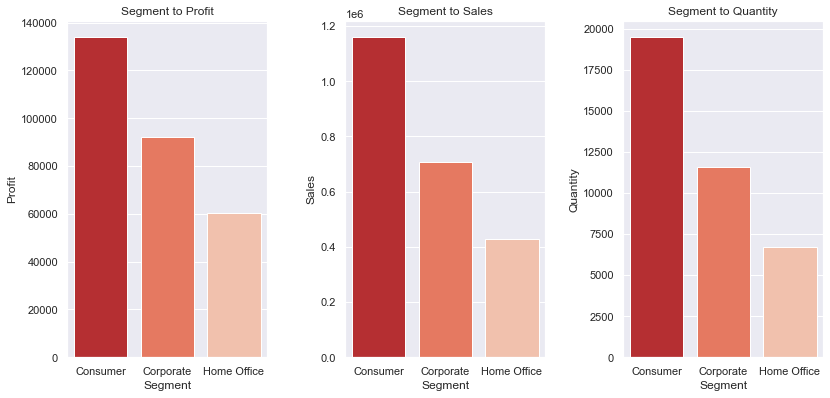

In [18]:
fig, axes = plt.subplots(1,3, figsize=(12,6))

sns.set_theme(style="darkgrid")
axes[0].set_title("Segment to Profit")
axes[1].set_title("Segment to Sales")
axes[2].set_title("Segment to Quantity")

sns.barplot(x=segment_df.index,
           y=segment_df['Profit'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[0])

sns.barplot(x=segment_df.index,
           y=segment_df['Sales'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[1])

sns.barplot(x=segment_df.index,
           y=segment_df['Quantity'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[2])

plt.tight_layout(pad=2);

---
**Interpretation:**

Most of the Profit is obtained from `Consumer` and the `Corporate Segment`. Hence focussing more and improvising the service for this two Segments can help grow even more.

---

## 3. Region

In [19]:
region_df = pd.DataFrame(df.groupby(['Region'])[['Profit', 'Sales', 'Quantity']].sum())
region_df

,Profit,Sales,Quantity
Region,,,
Central,39655.8752,500782.8528,8768
East,91506.3092,678435.1960,10609
South,46749.4303,391721.9050,6209
West,108329.8079,725255.6365,12234


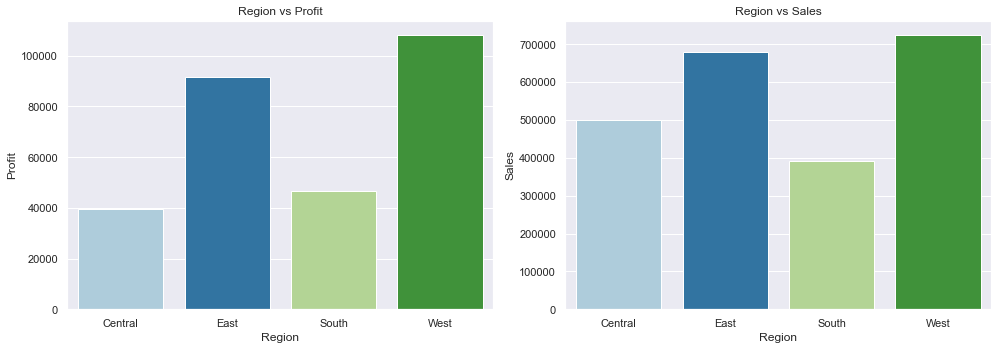

In [151]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

sns.set_theme(style="darkgrid")
axes[0].set_title("Region vs Profit")
axes[1].set_title("Region vs Sales")

sns.barplot(x=region_df.index,
           y='Profit',
           data=region_df,
           palette='Paired',
           ax=axes[0])

sns.barplot(x=region_df.index,
           y='Sales',
           data=region_df,
           palette='Paired',
           ax=axes[1])

plt.tight_layout(pad=1);

---
**Interpretation:**

Among the all regions, the West and East region recorded most of the profit. So, There should be focus on the `East` and `West` region to keep up with the Profits.

Even though there is considerably high sales in the `Cental` and `South` Regions the Profit aren't as much expected.Hence more focus should be given to check for this absurbdity and try improve the Profit of the Stores in this Regions. 

---

## 4. Category

In [21]:
category_df = pd.DataFrame(df.groupby(['Category'])[['Profit', 'Sales', 'Quantity']].sum())
category_df

,Profit,Sales,Quantity
Category,,,
Furniture,18421.8137,741306.3133,8020
Office Supplies,122364.6608,718735.2440,22861
Technology,145454.9481,836154.0330,6939


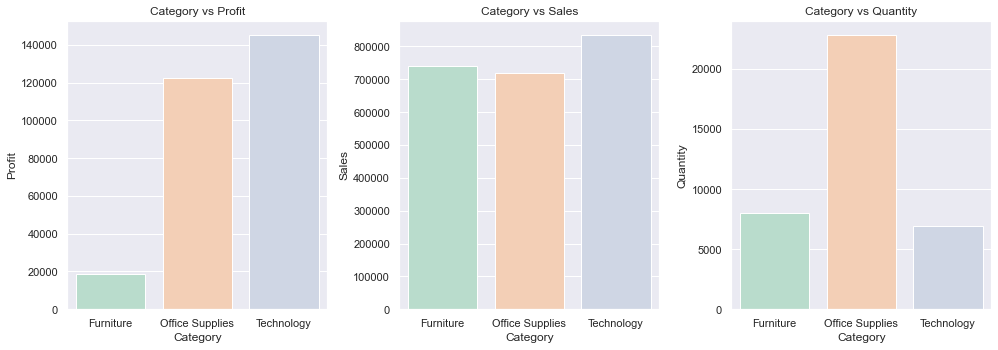

In [22]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

sns.set_theme(style="darkgrid")
axes[0].set_title("Category vs Profit")
axes[1].set_title("Category vs Sales")
axes[2].set_title("Category vs Quantity")

sns.barplot(x=category_df.index,
           y='Profit',
           data=category_df,
           palette='Pastel2',
           ax=axes[0])

sns.barplot(x=category_df.index,
           y='Sales',
           data=category_df,
           palette='Pastel2',
           ax=axes[1])

sns.barplot(x=category_df.index,
           y='Quantity',
           data=category_df,
           palette='Pastel2',
           ax=axes[2])

plt.tight_layout(pad=1);

---
**Interpretation:**

Most Profit is incurred from the `Technology`,even though the quantity of items purchased are less.

Also the`Office Supplies` make a pretty much part of the Profit,also the Quantity of Items purchased are more.

---

## 5. Sub-Category

In [23]:
sub_category_df = pd.DataFrame(df.groupby(['Sub-Category'])[['Profit', 'Sales', 'Quantity']].sum())
sub_category_df

,Profit,Sales,Quantity
Sub-Category,,,
Accessories,41936.6357,167380.3180,2976
Appliances,18138.0054,107532.1610,1729
Art,6524.6118,27107.0320,2996
Binders,30228.0003,203409.1690,5971
Bookcases,-3472.5560,114879.9963,868
Chairs,26567.1278,327777.7610,2351
Copiers,55617.8249,149528.0300,234
Envelopes,6964.1767,16476.4020,906
Fasteners,949.5182,3024.2800,914


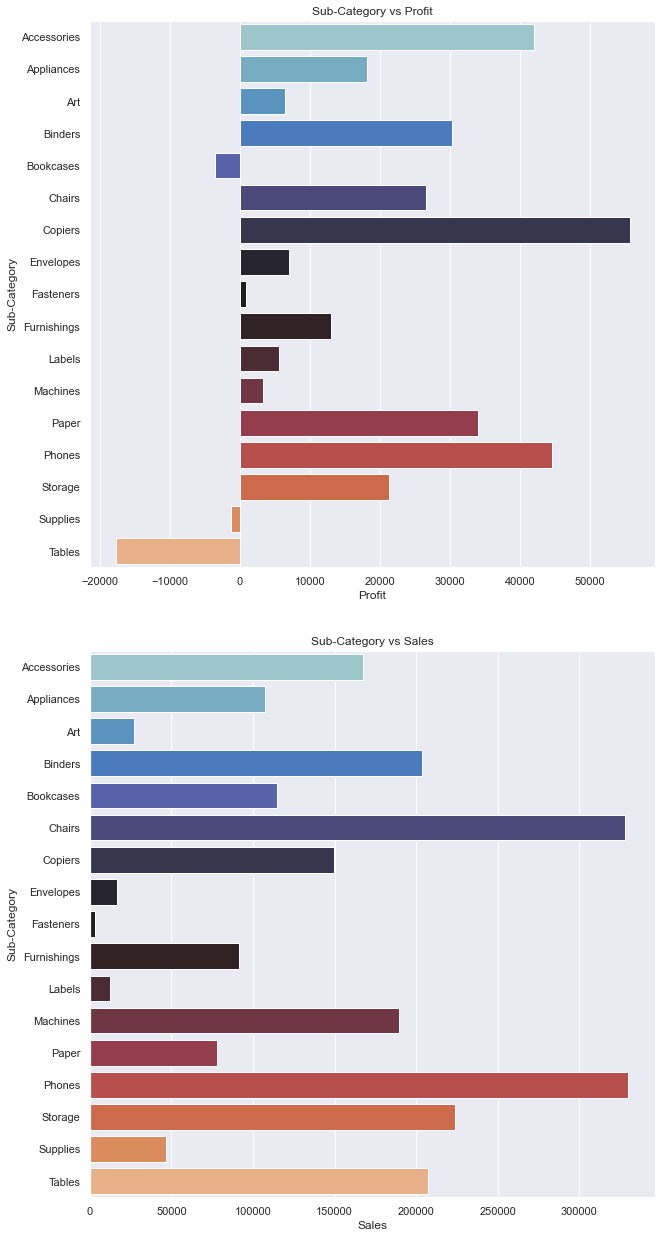

In [168]:
fig, axes = plt.subplots(2,1, figsize=(10,18))

sns.set_theme(style="darkgrid")
axes[0].set_title("Sub-Category vs Profit")
axes[1].set_title("Sub-Category vs Sales")

sns.barplot(y=sub_category_df.index,
           x='Profit',
           data=sub_category_df,
           palette='icefire',
           ax=axes[0])

sns.barplot(y=sub_category_df.index,
           x='Sales',
           data=sub_category_df,
           palette='icefire',
           ax=axes[1])
plt.tight_layout(pad=3);

---
**Analysis:**

* `Tables`,`Bookcases`,`Supplies` are the loss incurring goods.
* `Copiers`,`Phones`,`Accessories` are the most Profit making goods.
* `Chairs`,`Phones`,`Storage`,`Accessories` have the highest Sales.

---

## 6. Cities

In [163]:
cities_df = pd.DataFrame(df.groupby(['City'])[['Profit', 'Sales', 'Quantity']].sum().sort_values('Profit',ascending = False))
top10 = cities_df.head(10)
last10 = cities_df.tail(10)
high_low = top10.append(last10)

In [164]:
cities_df = pd.DataFrame(df.groupby(['City'])[['Profit', 'Sales', 'Quantity']].sum().sort_values('Sales',ascending = False))
top20= cities_df.head(20)

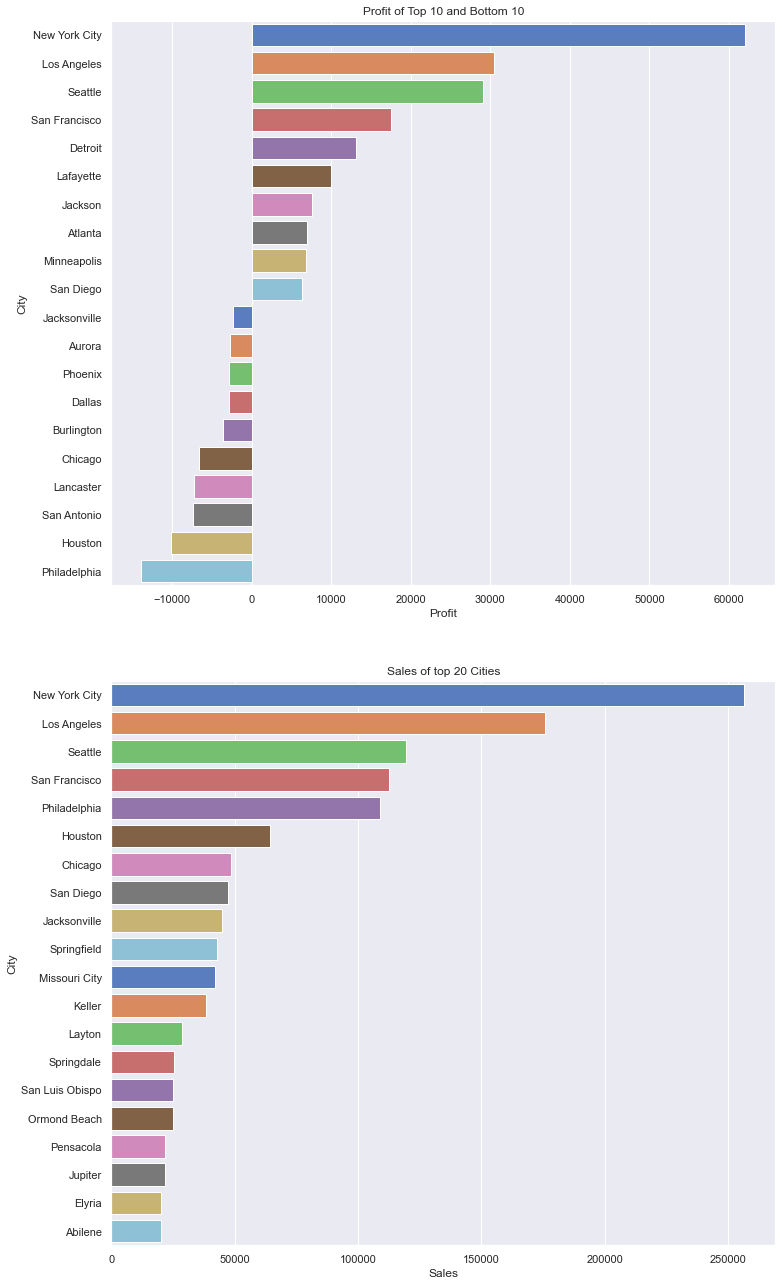

In [165]:
fig, axes = plt.subplots(2,1, figsize=(12, 19))

axes[0].set_title("Profit of Top 10 and Bottom 10")
axes[1].set_title("Sales of top 20 Cities")

sns.barplot(y=high_low.index,
           x='Profit',
           data=high_low,
           palette='muted',
           ax=axes[0])

sns.barplot(y=high_low_1.index,
           x='Sales',
           data=top20,
           palette='muted',
           ax=axes[1])
plt.tight_layout(pad=4);

---
**Interpretation:**

* `New York` ,`Los Angeles`,`Seattle`,`San Francisco`,`Philadelphia` have the highest number of the Sales.
* `New York` ,`Los Angeles`,`Seattle`,`San Francisco`,`Detroit` have the highest number of the Profit.
* `Philadelphia` has one of the highest Sales but has Negative Profit ,ie,Losses.This is definitely a point to be considered as Weak Point and attention needs to be given to increase the Profit. 
* There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target these `Top 10 Cities`.

---

# Final Conclusions:

Consider following recommendations for higher profit:-
* Focus on category Technology like Phones as they are highest selling and most profitable. Bundle them with the less profitable products to offset the losses like tables and suppplies.
* Selling bookcases, tables and supplies result in losses, so SuperStores has to consider to bundle them together with High Selling or Profitable sub-category such as Machines, Copiers, Phones etc.
* For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so creating a Home Office Catalog with products used for offices such as paper, chairs, phone, copiers, storage,machines would result in better profits.
* Target consumer customers from East and West region of top 10 cities with most profits, with special promotions and advertisments for copiers, phones, accessories etc.

___
